### Clustering Analysis – Customer Segmentation

#### Problem Statement
Perform customer segmentation using clustering techniques to group customers based on their 
purchasing behavior, allowing businesses to target each segment effectively

#### Data Selection

In [3]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [4]:
og_data = pd.read_csv('Mall_Customers.csv')
data = og_data
data.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
data.shape

(200, 5)

In [6]:
data.isna().sum()

CustomerID            0
Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64

In [7]:
data.drop_duplicates(inplace=True)

In [8]:
data.dtypes

CustomerID             int64
Genre                 object
Age                    int64
Annual_Income_(k$)     int64
Spending_Score         int64
dtype: object

In [9]:
data.describe()

,CustomerID,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [10]:
data.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual_Income_(k$)', 'Spending_Score'], dtype='object')

In [11]:
data = data.rename(columns={'Genre':'Gender'})

In [12]:
data.head()

,CustomerID,Gender,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### Data Preprocessing
##### Standardize the data

In [13]:
num_cols = ['Age', 'Annual_Income_(k$)', 'Spending_Score']

In [14]:
from sklearn.preprocessing import StandardScaler
scaler_standard = StandardScaler()
data_standardized = data.copy()
data_standardized[num_cols] = scaler_standard.fit_transform(data[num_cols])

data is standardized witth standard scalar, Since different features may have different ranges (e.g., age in years vs. income in thousands), clustering algorithms like K-Means may give more importance to large-scale features, which can lead to biased results.

In [15]:
data_standardized.head()

,CustomerID,Gender,Age,Annual_Income_(k$),Spending_Score
0,1,Male,-1.424569,-1.738999,-0.434801
1,2,Male,-1.281035,-1.738999,1.195704
2,3,Female,-1.352802,-1.700830,-1.715913
3,4,Female,-1.137502,-1.700830,1.040418
4,5,Female,-0.563369,-1.662660,-0.395980


In [16]:
data_standardized = data_standardized.drop(columns=['CustomerID', 'Gender']) #cause gender and customerID has no relation to cluster the customers

#### Clustering

##### Determing the number of clusters
For this we use following method

---Elbow Method---

Calculates Within-Cluster Sum of Squares (WCSS) for different cluster numbers.
The point where the WCSS stops decreasing significantly (elbow point) is the optimal number of clusters.

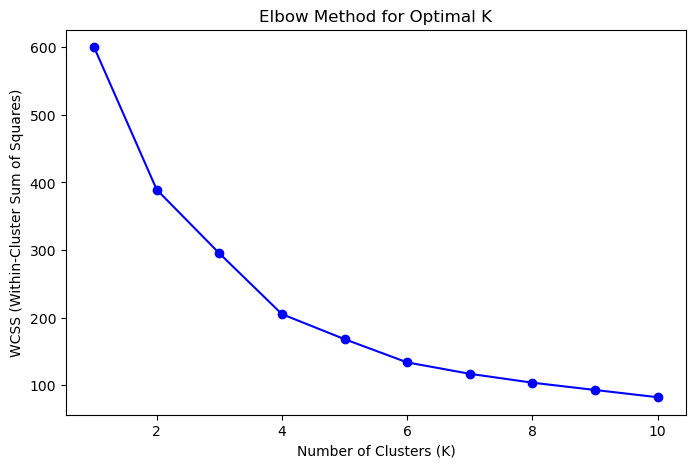

In [17]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
wcss = []
K_range = range(1, 11)  # Checking clusters from 1 to 10, we can reduce or increase the range based on teh data

# Compute the WCSS for each K
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_standardized)
    wcss.append(kmeans.inertia_)  # inertia_ = WCSS

# Plot Elbow Graph
plt.figure(figsize=(8,5))
plt.plot(K_range, wcss, marker='o', linestyle='-', color='b')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal K")
plt.show()

The optimal K is the "elbow point" where the WCSS stops decreasing significantly.

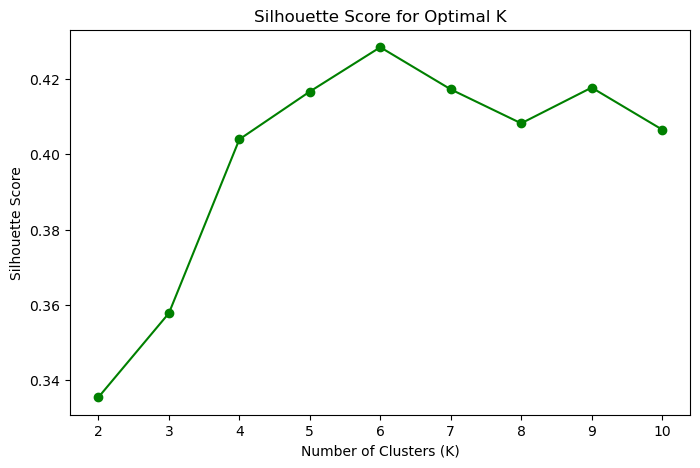

In [18]:
from sklearn.metrics import silhouette_score
silhouette_scores = []  # Store silhouette scores

# Compute silhouette scores for each K (from 2 to 10)
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data_standardized)  # Get cluster labels
    silhouette_scores.append(silhouette_score(data_standardized, labels))

# Plot Silhouette Scores
plt.figure(figsize=(8,5))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='-', color='g')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Optimal K")
plt.show()

The higher the Silhouette Score, the better the clustering. For K = 6 the silhouette score is highest.

##### K-Means Clustering

In [19]:
# Apply K-Means with K = 6
kmeans = KMeans(n_clusters=6, random_state=42, n_init=10)
data['Cluster'] = kmeans.fit_predict(data_standardized)  # Assign clusters

# cluster counts
print(data['Cluster'].value_counts())


data.head()

Cluster
0    45
1    39
3    39
2    33
4    23
5    21
Name: count, dtype: int64


,CustomerID,Gender,Age,Annual_Income_(k$),Spending_Score,Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,4
2,3,Female,20,16,6,5
3,4,Female,23,16,77,4
4,5,Female,31,17,40,5


Now we clustered the total customers into 6 clusters

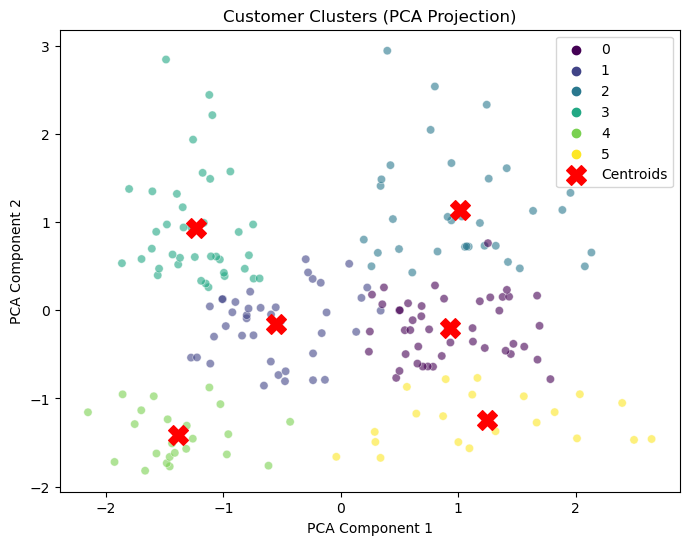

In [20]:
from sklearn.decomposition import PCA
import seaborn as sns
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_standardized)  # Reduce dimensions

data['PCA1'] = data_pca[:, 0]
data['PCA2'] = data_pca[:, 1]

# plot for the pca
plt.figure(figsize=(8,6))
sns.scatterplot(x=data['PCA1'], y=data['PCA2'], hue=data['Cluster'], palette="viridis", alpha=0.6)
plt.scatter(pca.transform(kmeans.cluster_centers_)[:, 0], 
            pca.transform(kmeans.cluster_centers_)[:, 1], 
            s=200, c='red', marker='X', label='Centroids')
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Customer Clusters (PCA Projection)")
plt.legend()
plt.show()

<Figure size 600x600 with 0 Axes>

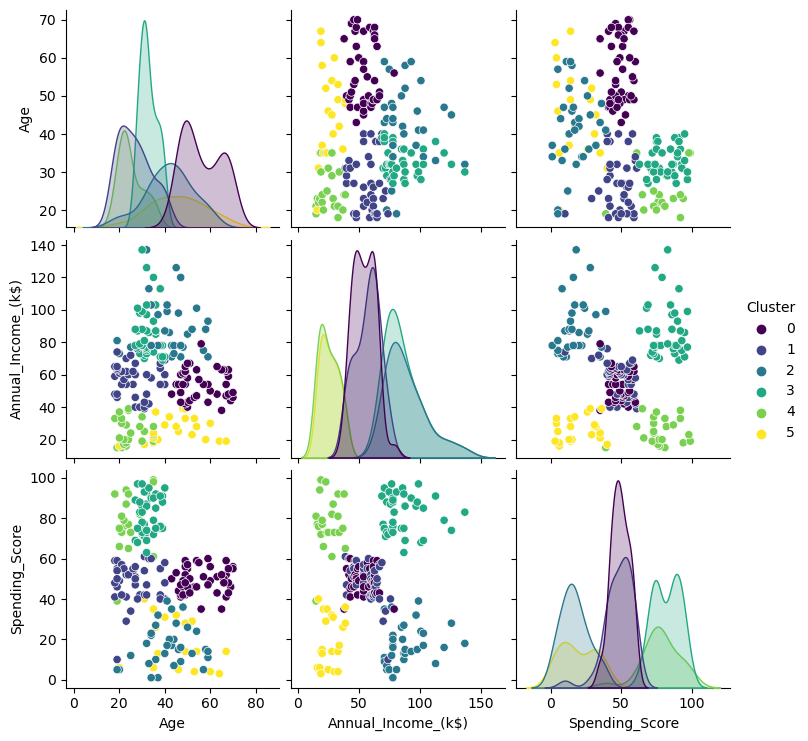

In [21]:
# **Pair Plot of Features with Cluster Colors**

plt.figure(figsize=(6,6))
sns.pairplot(data[num_cols + ['Cluster']], hue='Cluster', palette='viridis', diag_kind='kde')
plt.show()

In [26]:
data.sort_values(by='Cluster', inplace=True)
data

,CustomerID,Gender,Age,Annual_Income_(k$),Spending_Score,Cluster,PCA1,PCA2
71,72,Female,47,49,42,0,0.659161,-0.411068
67,68,Female,68,48,48,0,1.561089,-0.412566
73,74,Female,60,50,56,0,0.932539,-0.365354
55,56,Male,47,43,41,0,0.697575,-0.638351
92,93,Male,48,60,49,0,0.497782,0.000203
...,...,...,...,...,...,...,...,...
2,3,Female,20,16,6,5,0.337862,-1.674799
30,31,Male,60,30,4,5,2.394820,-1.051593
20,21,Male,35,24,35,5,0.288561,-1.379881
10,11,Male,67,19,14,5,2.495689,-1.470489
